# 04. Pytorch Custom Datasets Video Notebook

we've used some datasets with pytorch before

But how do you get your own data into pytorch

One of the ways to do so is via: custom datasets

## Domain libraries

Depending on what you're working on, visio, text, audio, recommendation, you'll want to look into each of the pytorch domain libraries for existing data loading functions and custumizable data loading functions

## 0. Import PyTorch and setting up the device-agnostic code

In [ ]:
import torch
from torch import nn

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 1.Get data

Food101 starts 101 diferents classes of food and 1000 images per classe(750 to training, 250 to testing)

Our dataset starts with 3 classes of food and only 10% of the images(75 to training, 25 to testing)

Why do this?

When start out ML projects, it's important to try things on small scale them increase the scale when necessary.

The whole point it to speed up  how fast your can experiment

In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data loader
data_path = Path("data/")
image_path = data_path/"pizza_steak_sushi"

# If the imagem folder doesn't exit,  downlod it and unzip it...
if image_path.is_dir():
  print(f"{image_path} directory alredy exist... skipping download")

else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi data
with open(data_path/"pizza_steak_sushi.zip", 'wb') as f:
  request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
  print("Downloading pizza, steak and sushi data...")
  f.write(request.content)


with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", 'r') as zip_ref:
  print("Unzipping pizza, steak and sushi data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist, creating one...
Unzipping pizza, steak and sushi data...


##2. Becoming one with the data (data preparation and data exploration)

In [ ]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its content"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi


In [ ]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing an image

Let's write some code to:

1. Get all of the data image paths
2. Pick a random image path using Python's `random.choice()`
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we're working with images, let's open the image with Python's PIL
5. We'll then show the image and print metadata

In [ ]:
image_path

PosixPath('data/pizza_steak_sushi')

data/pizza_steak_sushi/test/pizza/1152100.jpg
pizza
Random image path: data/pizza_steak_sushi/test/pizza/1152100.jpg
Image Class: pizza
Image height: 384
Image width: 512


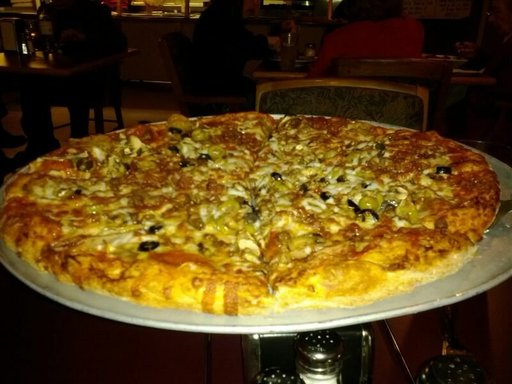

In [ ]:
import random
from PIL import Image

# Set seed
#random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Getting image class from the path name(the image class is the name of the parent
#    directory, because the dataset is in the standart format for image classification )
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img  = Image.open(random_image_path)

# 5.Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image Class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 511.5, 383.5, -0.5)

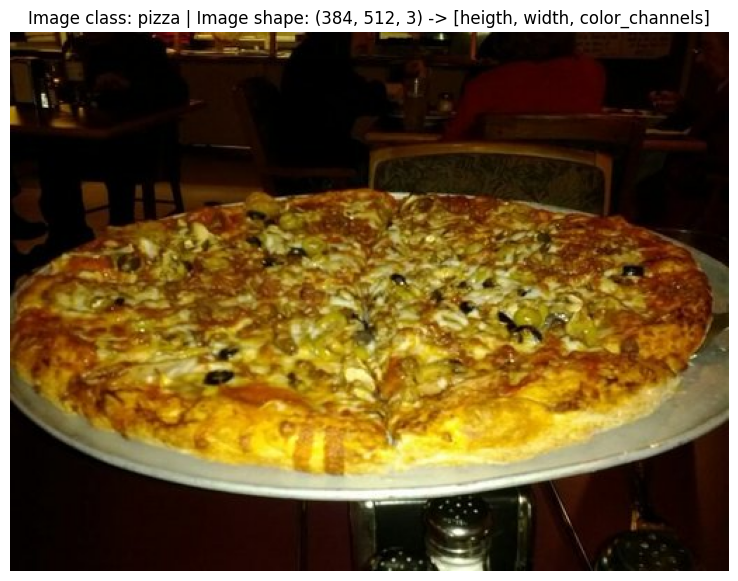

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Converting a PIL image to ndarray
#img_as_array = np.array(img)
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [heigth, width, color_channels]")
plt.axis(False)

## 3. Transforming data

Before we can use our image data with pytorch:
1. Turn your target into tensors(in our case, numerical representation of our images).
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader`, we'll call these `DataSet` and `DataLoader`

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transform data with `torchvision.transforms`

Transforms help you get your images ready to be used with a model/perform data augmentation

In [ ]:
from torchvision.transforms.transforms import RandomHorizontalFlip
# Write a transform for image
data_transform = transforms.Compose({
    # Resize out image to 64x64
    transforms.Resize(size=(64, 64)),

    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),

    # Turn the image into a torch.Tensor
    transforms.ToTensor()
})

In [ ]:
data_transform(img_as_array).shape

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:152: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which me

torch.Size([3, 64, 64])

In [ ]:
data_transform(img).shape

torch.Size([3, 64, 64])

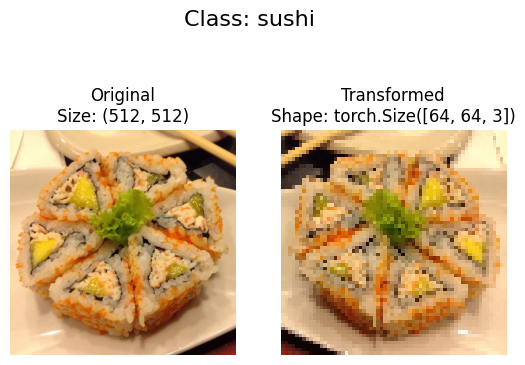

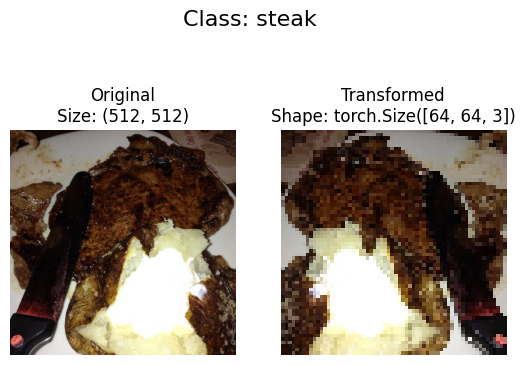

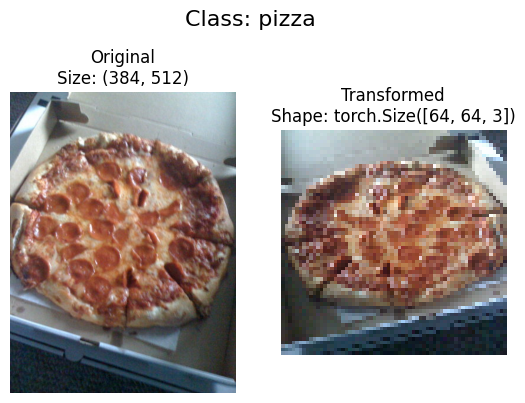

In [ ]:
def plot_transformed_images(image_paths: list, transform, n=3,  seed=None):
  """
  Selects random images from a path of images and loads/transforms
  them then plots the original vs the tranformed version
  """

  if seed:
    random.seed(seed)

  random_image_path = random.sample(image_paths, k=n)
  for image_path in random_image_path:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0) # Note we will need to change shape for matplotlib (C, H, W) -> (H, W, C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list, transform=data_transform, n=3, seed=None)


## 4. Option 1: Loading image data using `ImageFolder`

Build-in class that represents the standart format for classification image

We can load image classification data using `torchvision.datasets.ImageFolder`

In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=str(train_dir),
                                   transform=data_transform, # A transform for the data
                                   target_transform=None # A transform for the labels/targets
                                   )

test_data = datasets.ImageFolder(root=str(test_dir),
                                  transform=data_transform)

train_data, test_data


(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
            ))

In [ ]:
# Get class names as  list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# Check the lengths of our dataset
len(train_data), len(test_data)

(225, 75)

In [ ]:
class_dict = train_data.class_to_idx

In [ ]:
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
train_data.targets

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [ ]:
train_data.samples[0] # path to image, label

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [ ]:
# Index on the train_data Dataset to get a single image and its label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label} | {class_names[label]}")
print(f"Label datatype: {type(label)}") # Three big issues: Datype mismatch, shape mismatch and device mismatch

Image tensor
 tensor([[[0.1176, 0.1176, 0.1275,  ..., 0.1010, 0.1069, 0.1147],
         [0.1255, 0.1314, 0.1265,  ..., 0.0980, 0.0873, 0.1059],
         [0.1314, 0.1343, 0.1353,  ..., 0.0961, 0.0873, 0.1088],
         ...,
         [0.1725, 0.1549, 0.1706,  ..., 0.1353, 0.1078, 0.1137],
         [0.1784, 0.1657, 0.1716,  ..., 0.1118, 0.1000, 0.0804],
         [0.1735, 0.1569, 0.1627,  ..., 0.0961, 0.0873, 0.0892]],

        [[0.0627, 0.0627, 0.0608,  ..., 0.0775, 0.0716, 0.0716],
         [0.0588, 0.0647, 0.0598,  ..., 0.0745, 0.0647, 0.0735],
         [0.0686, 0.0716, 0.0725,  ..., 0.0725, 0.0657, 0.0735],
         ...,
         [0.2392, 0.2333, 0.2490,  ..., 0.1510, 0.1343, 0.1235],
         [0.2392, 0.2392, 0.2559,  ..., 0.1255, 0.1235, 0.1039],
         [0.2343, 0.2304, 0.2333,  ..., 0.1118, 0.1029, 0.1049]],

        [[0.0235, 0.0235, 0.0216,  ..., 0.0931, 0.0912, 0.0951],
         [0.0098, 0.0157, 0.0206,  ..., 0.0902, 0.0804, 0.0922],
         [0.0176, 0.0127, 0.0137,  ..., 0.08

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Original shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

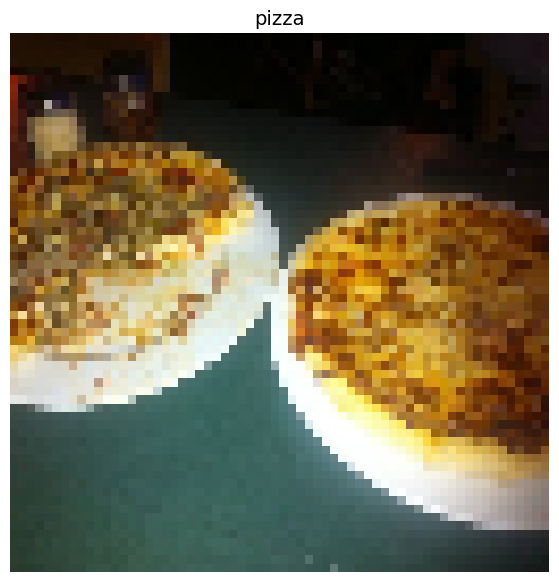

In [ ]:
# Rearrange the order dimensions for matplotlib
img_permute = img.permute(1,2,0)

print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Original shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label], fontsize=14)

## 4.1 Turn loaded images into `DataLoader`'s


A `DataLoader` is going to help us turn our `Dataset`'s into iterables and we customise the `batch_size` so our model can see `batch_size` images at a time

In [ ]:
from torch.utils.data import DataLoader
import os

print(os.cpu_count())

# turn train and test datasets into DataLoader's
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=False)

2


In [ ]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [ ]:
len(train_data), len(test_data)

(225, 75)

In [ ]:
# Plot a image from a dataloader
img, label = next(iter(train_dataloader))

# Batch size will now be 1
print(f"Image shape: {img.shape} -> [batch_size, color_channels, heigth, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, heigth, width]
Label shape: torch.Size([1])


## 5. Option 2: Loading Image Data with a Custom `Dataset`

1. Want to be able to load images from file
2. Want to be able to get class names from the Dataset
3. Want to be able to get class names as dictonary from the Dataset

Pros:

- Can create a `Dataset` out of almost anything
- No limited to Pytorch pre-build `Dataset` function

Cons:

- Even though you cold create `Dataset` out of almost anything, it's doesn't mean it will work...
- Using a custom `Dataset` often results in writing more code, which could be prone to erros or performance issues


All custom datasets in Pytorch, often subclass - https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
# Instance of ImageFolder
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

###5.1 Createing a helper function to get class names

We want a function to

1. Get the class names using `os.scandir` to traverse a target directory(ideally the directory is in standad image classification)
2. Raise a erro if the class names arent't found(if this happens, there might be something wrong with the directoy structure)
3. Turn the class names into a dict and a list and return them

In [ ]:
# Setup path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found
class_dict = {key:value for value, key in enumerate(class_names)}
class_dict

Target dir: data/pizza_steak_sushi/train


{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
list(os.scandir(target_directory))

[<DirEntry 'steak'>, <DirEntry 'pizza'>, <DirEntry 'sushi'>]

In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Finds the class folder names in a target directory."""

  # 1. Get the class names by scanning the target direcory
  classes = sorted([entry.name for entry in list(os.scandir(target_directory))])

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Coudn't find any classes in {directory}...")

  # Create a dictionary of index labels(computer prefers number rather than string as labels)
  class_to_idx = {class_name:label for label, class_name in enumerate(class_names)}

  return classes, class_to_idx

In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset to replicate `ImageFolder`

To create our onw custom dataset, we want to:

1. Subclass `torch.ultis.data.Datase`
2. Init our subclass with target directory(the directory we'd like to get data from) as well as a transform if we'd like to transformour data
3. Create several attributes:
  * paths - paths of our images
  * transform - the transform we'd like to use
  * classes - a list of the target classes
  * class_to_idx - a dict of the target classes mapped to interger labels
4. Create a functions to `load_images` this function will open a image
5. Overwrite the `__len__()` method to return the length of our dataset
6. Overwrite the `__getitems__()` methos to give a sample when passed an index
  

In [ ]:
# 0. Write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Initiaze our custom dataset
  def __init__(self, targ_dir: str, transform=None):
    # 3. Create class attributes
    # Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob('*/*.jpg'))

    # Setup transform
    self.transform = transform

    # Create a classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # 4. Create a function to load an image
  def load_image(self, index: int) -> Image.Image:
    """Opens an image via a path and return it"""
    image_path = self.paths[index]
    return Image.open(image_path)


  # 5. Overwrite __len__()(Optional)
  def __len__(self) -> int:
    """Returns the total number of samples"""
    return len(self.paths)

  # 6. Overwrite __getitem__() to return a particular sample (Required)
  def __getitem__(self, index: int) -> Tuple[torch.Tensor|Image.Image, int]:
    """Return one sample of data, data and label (X, y)."""

    img = self.load_image(index)
    class_name = self.paths[index].parent.name # It expects path in format data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Tranform if necessary
    if self.transform:
      return self.transform(img), class_idx # Return data,label (X, y)

    return img, class_idx # Return untransformed image and label

In [ ]:
# Create a transform
from torchvision import transforms

train_transforms = transforms.Compose([transforms.Resize(size=(64, 64),),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.ToTensor()
                                    ])

test_transforms = transforms.Compose([transforms.Resize(size=(64, 64),),
                                      transforms.ToTensor()
                                    ])

In [ ]:
# Test out ImageFolderDataCustom
train_data_custom = ImageFolderCustom(str(train_dir),
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(str(test_dir),
                                      transform=train_transforms)

In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7cec4e1bae90>,
 <__main__.ImageFolderCustom at 0x7cec4e1b94e0>)

In [ ]:
len(train_data), len(train_data_custom)

(225, 225)

In [ ]:
len(test_data), len(test_data_custom)


(75, 75)

In [ ]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
# Check for equality between original ImageFolder Daset and ImageFolderCustom Dataset
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


### 5.3 Create a function to display random image

1. Take in a `Dataset and a number of other parameters such as class names and how many images to visualize.
2. To prevent the display getting out of hand, let's cap the number of images to see at 10
3. Set a random seed for reproducibility
4. Get a list of random sample indexes from the target dataset
4. Set up a maptplotlib plot
6. Loop through the random sample images and plot them with matplotlib
7. Make sure the dimensions of our images line up with matplotlib(HWC)

In [ ]:
import matplotlib.pyplot as plt
# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

  # 2. Adjust display if n is to high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display purposes, n shouldn't be lagger than 10, setting to 10 and removing shape display.")

  # 3. Set the seed
  if seed:
    random.seed(seed)

  # 4. Get random sample index
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # 5. Setup plot
  fig = plt.figure(figsize=(16, 8))


  # 6. Loop through random indexes and plot them with matplotlib
  title = ""
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plottin
    targ_image_adjust = targ_image.permute(1, 2, 0) # [colors_channel, heigth, width] -> [heigth, width, colors_channel]

    # Plot adjusted samples
    ax = fig.add_subplot(1, n, i+1)
    ax.imshow(targ_image_adjust)
    ax.axis('off')

    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"


    ax.set_title(title)


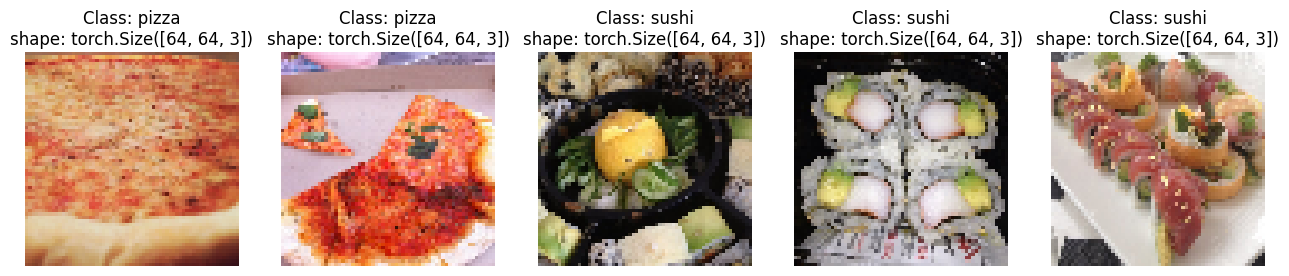

In [ ]:
# Display random images from ImageFolder created dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

For display purposes, n shouldn't be lagger than 10, setting to 10 and removing shape display.


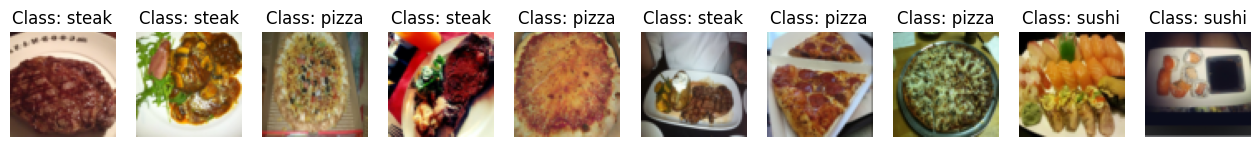

In [ ]:
# Display random images from ImageFolderCustom created dataset
display_random_images(train_data_custom,
                      n=15,
                      classes=class_names,
                      seed=None)

### 5.4 Turn custom loaded images into DataLoader's

In [ ]:
from torch.utils.data import DataLoader
import os
CUSTOM_BATCH = 32
NUM_WORKERS = int(os.cpu_count())
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                       batch_size=CUSTOM_BATCH,
                                       num_workers=NUM_WORKERS, # How namy cores will load your data, generally higher is better
                                       shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                       batch_size=CUSTOM_BATCH,
                                       #num_workers=os.cpu_count(),
                                       num_workers=NUM_WORKERS,
                                       shuffle=False)

In [ ]:
# Get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))

# shapes
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## 6. Other form  of transforms(data augmentation)

Data augmentation is the process of artificially adding diversity to your **training** data.

In the case of image data, this may mean applying various image transformations to the training images.

This practice hopefully results in a model that's more generalizable to unseen data.

Let's take a look at one particular type of data augmentation used to train pytorch vision models to state of the art levels...

Blog post: https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/

In [ ]:
# Let's look at trivailaugment - https://pytorch.org/vision/main/generated/torchvision.transforms.TrivialAugmentWide.html
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),# Intensity between 0 and 31
    transforms.ToTensor()
])


test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])


In [ ]:
# Gel all images paths
image_path_list = list(image_path.glob('*/*/*.jpg'))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/steak/1736968.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/176508.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/560503.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2979061.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3577618.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3142045.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2287136.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1961025.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2707522.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3074367.jpg')]

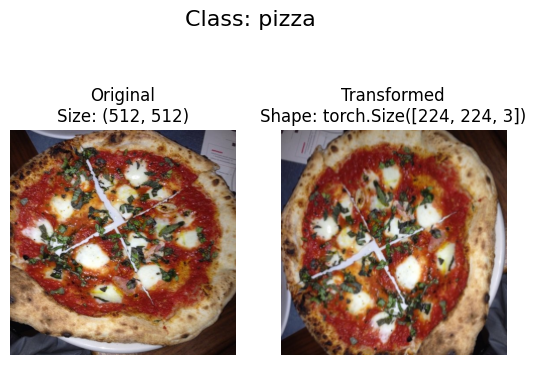

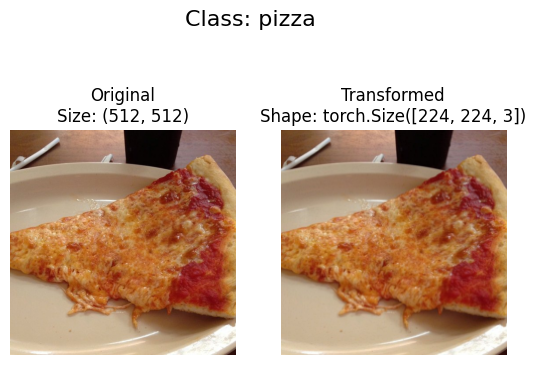

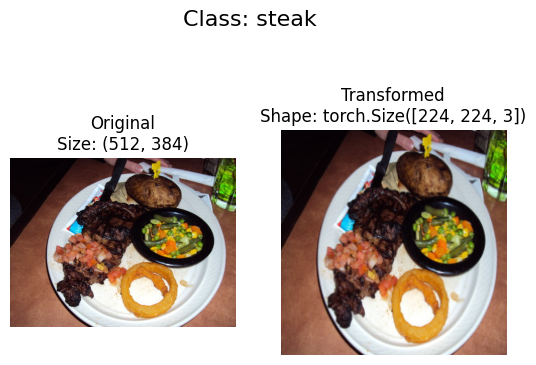

In [ ]:
# Plot random transformed images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3,
    seed=None
)

## 7. Model 0: TinyVGG without data augmentation


### 7.1 Creating tranforms and loading data form Model 0

In [ ]:
# Create a simple transforms and loading
simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [ ]:
# 1. Load and transform data
train_data_simple = datasets.ImageFolder(root=str(train_dir),
                                          transform=simple_transform,
                                          )

test_data_simple = datasets.ImageFolder(root=str(test_dir),
                                          transform=simple_transform,
                                        )

In [ ]:
train_data_simple, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [ ]:
# 2. Turn the datasets into DataLoaders
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
NUM_WORKERS = 0 if NUM_WORKERS is None else int(NUM_WORKERS)
print(NUM_WORKERS)

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                   batch_size=BATCH_SIZE,
                                   num_workers=NUM_WORKERS,
                                   shuffle=True)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                   batch_size=BATCH_SIZE,
                                   num_workers=NUM_WORKERS,
                                   shuffle=False)

2


In [ ]:
train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7cec4de77760>,
 <torch.utils.data.dataloader.DataLoader at 0x7cec4d31ea70>)

### 7.2 Create the tinyVGG model class

In [ ]:
import torch
from torch import nn

class TinyVGGModel0(nn.Module):
  """Model architecture copying from CNN explorer"""
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
    super().__init__()
    self.block_conv1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),

        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),

        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
    )

    self.block_conv2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),

        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),

        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13, out_features=output_shape)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    x = self.block_conv1(x)
    x = self.block_conv2(x)
    #print(x.shape)
    x = self.classifier(x)
    return x
    # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

In [ ]:
torch.manual_seed(42)
model_0 = TinyVGGModel0(input_shape=3,
                        hidden_units=10,
                        output_shape=len(class_names)).to(device)

model_0

TinyVGGModel0(
  (block_conv1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_conv2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 Try a forward pass on a single image(to test the model)

In [ ]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch

(torch.Size([32, 3, 64, 64]),
 tensor([0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2,
         0, 1, 0, 1, 2, 0, 2, 1]))

In [ ]:
# Try a forward pass
model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4668e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9131e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6415e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.1665e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

### 7.4 Use torchinfo to get an idea of shapes going through our model

In [ ]:
# import torchinfo
try:
  import torchinfo
except:
  !pip install torchinfo

from torchinfo import summary
summary(model_0, input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGGModel0                            [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

### 7.5 Create train and test  loops functions

- `train_step()` - Takes in a model and a dataloader and trains the model on the dataloader

- `test_step()` - Takes in a model and dataloader and evaluates the models on the dataloader

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
from helper_functions import accuracy_fn

In [ ]:
# Create train_step() function
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               optimizer: torch.optim.Optimizer,
               loss_fn: torch.nn.Module,
               device=device):

  model.train()
  model.to(device)

  # Train loss and acurracy
  train_loss = 0
  train_acc = 0

  # Loop through batchs
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device) # Send the batchs to target device

    # 1. Forward pass
    y_logits = model(X)

    # 2. Loss and accuracy
    loss = loss_fn(y_logits, y)

    # Accumulate the loss
    train_loss += loss.item()

    # 3. Zero grad
    optimizer.zero_grad()

    # 4. Backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Accuracy manualy
    y_pred_class = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_logits)


  # Average metrics per batch
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  #print(f"Train Loss: {train_loss} | Train Accuracy: {train_acc}")
  return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn,
              device=device):
  """This function is a evaluation per epoch with test dataset"""
  # Put the model in eval mode
  model.eval()

  # Setup the loss and accuracy
  test_loss, test_acc = 0, 0

  # Turn on the inference contect manager
  with torch.inference_mode():
    # Loop through Dataloader batchs
    for batch, (X, y) in enumerate(dataloader):

      # Send dat to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate and accumulate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss

      # Calculate and acumulate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)

  return test_loss, test_acc

### 7.6 creating a `train()` function to combine `train_step()` and `test_step()`

In [ ]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in varius model parameters + optimizer
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):

  # 2. Create empty results dictionary
  results = {
      "train_loss": [],
      'train_acc': [],
      'test_loss': [],
      'test_acc': []
  }

  # 3. Loop through training  and testing steps for a number of epoch
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)

    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # 4.Print our whast's happening
    print(f"Epoch: {epoch} | Train Loss: {train_loss} - Train acc: {train_acc} | Test Loss: {test_loss} - Test acc: {test_acc}")

    # 5. Update results dictionary
    results['train_loss'].append(train_loss)
    results['train_acc'].append(train_acc)
    results['test_loss'].append(test_loss)
    results['test_acc'].append(test_acc)

  return results


### 7.7 Test and evaluate mode_0

In [ ]:
# Set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Setup number of epochs
NUM_EPOCHS = 5

# Reacreate an instance of TinyVGG
model_0 = TinyVGGModel0(input_shape=3,
                        hidden_units=10,
                        output_shape=len(class_names)).to(device)


# Create the optimizer and loss function
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

# Start timer
from timeit import  default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total train timer {end_time-start_time} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 1.106319084763527 - Train acc: 0.3046875 | Test Loss: 1.098320484161377 - Test acc: 0.30113636363636365
Epoch: 1 | Train Loss: 1.0998057276010513 - Train acc: 0.328125 | Test Loss: 1.069690227508545 - Test acc: 0.5416666666666666
Epoch: 2 | Train Loss: 1.0868544578552246 - Train acc: 0.48828125 | Test Loss: 1.0807572603225708 - Test acc: 0.49242424242424243
Epoch: 3 | Train Loss: 1.0842333137989044 - Train acc: 0.3984375 | Test Loss: 1.060831904411316 - Test acc: 0.5833333333333334
Epoch: 4 | Train Loss: 1.0662163347005844 - Train acc: 0.4140625 | Test Loss: 1.0653959512710571 - Test acc: 0.5643939393939394
Total train timer 10.548065382999994 seconds


In [ ]:
model_0_results

{'train_loss': [1.106319084763527,
  1.0998057276010513,
  1.0868544578552246,
  1.0842333137989044,
  1.0662163347005844],
 'train_acc': [0.3046875, 0.328125, 0.48828125, 0.3984375, 0.4140625],
 'test_loss': [tensor(1.0983),
  tensor(1.0697),
  tensor(1.0808),
  tensor(1.0608),
  tensor(1.0654)],
 'test_acc': [0.30113636363636365,
  0.5416666666666666,
  0.49242424242424243,
  0.5833333333333334,
  0.5643939393939394]}

### 7.8 Plot the loss curves of Model 0

In [ ]:
from typing import Dict, List
def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots training curves of a result dictionary"""

  # Get the loss values of the results dictionary(training and test)
  loss = results['train_loss']
  test_loss = results['test_loss']

  # Get the accuracy of the results dictionary(training and test)
  accuracy = results['train_acc']
  test_accuracy = results['test_acc']

  # Figure out how many epochs there were
  epochs = range(len(results['train_loss']))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # Plot the loss
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='train_loss')
  plt.plot(epochs, test_loss, label='test_loss')
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label='train_accuracy')
  plt.plot(epochs, test_accuracy, label='test_accuracy')
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

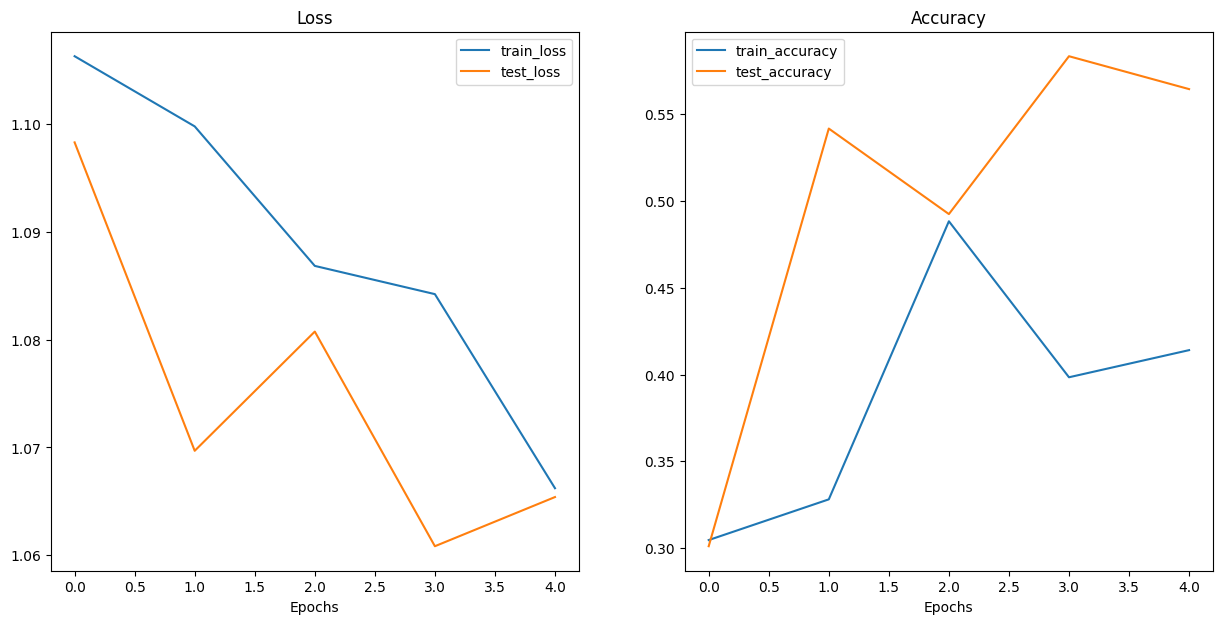

In [ ]:
plot_loss_curves(model_0_results)

## 8. What should an ideal loss curve look like?

A loss curve is one of the most helpfu ways to troubleshoot a model

https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic?hl=pt-br

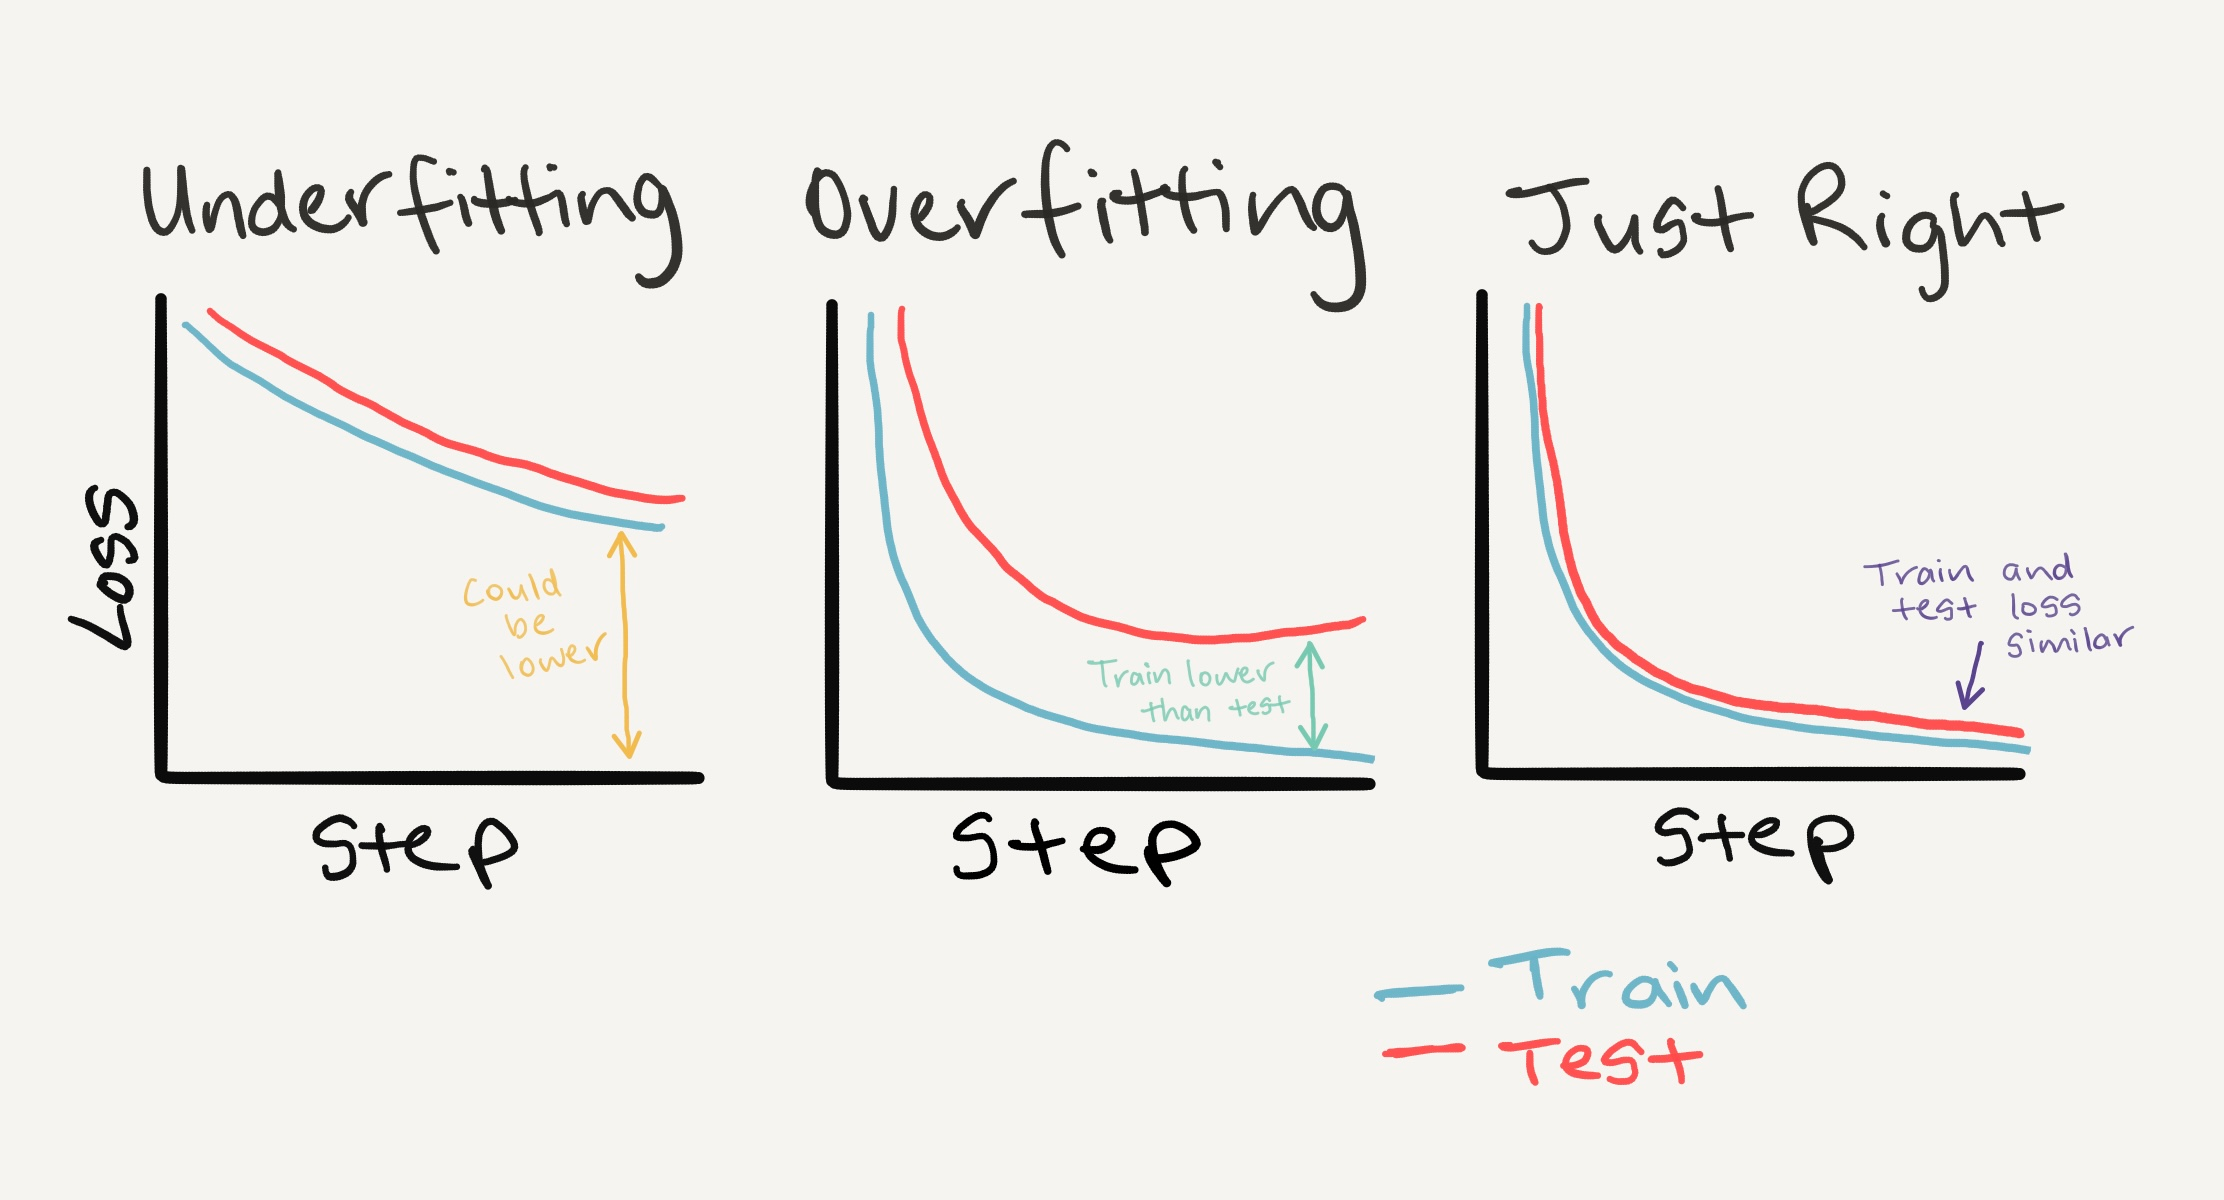

### 8.1 How to deal with overfitting

Since the main problem with overfitting is that you're model is fitting the training data *too well*, you'll want to use techniques to "reign it in".

A common technique of preventing overfitting is known as [**regularization**](https://ml-cheatsheet.readthedocs.io/en/latest/regularization.html).

I like to think of this as "making our models more regular", as in, capable of fitting *more* kinds of data.

Let's discuss a few methods to prevent overfitting.

| **Method to prevent overfitting** | **What is it?** |
| ----- | ----- |
| **Get more data** | Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples. |
| **Simplify your model** | If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer. |
| **Use data augmentation** | [**Data augmentation**](https://developers.google.com/machine-learning/glossary#data-augmentation) manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data. |
| **Use transfer learning** | [**Transfer learning**](https://developers.google.com/machine-learning/glossary#transfer-learning) involves leveraging the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images. |
| **Use dropout layers** | Dropout layers randomly remove connections between hidden layers in neural networks, effectively simplifying a model but also making the remaining connections better. See [`torch.nn.Dropout()`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html) for more. |
| **Use learning rate decay** | The idea here is to slowly decrease the learning rate as a model trains. This is akin to reaching for a coin at the back of a couch. The closer you get, the smaller your steps. The same with the learning rate, the closer you get to [**convergence**](https://developers.google.com/machine-learning/glossary#convergence), the smaller you'll want your weight updates to be.  |
| **Use early stopping** | [**Early stopping**](https://developers.google.com/machine-learning/glossary#early_stopping) stops model training *before* it begins to overfit. As in, say the model's loss has stopped decreasing for the past 10 epochs (this number is arbitrary), you may want to stop the model training here and go with the model weights that had the lowest loss (10 epochs prior). |

There are more methods for dealing with overfitting but these are some of the main ones.

As you start to build more and more deep models, you'll find because deep learnings are *so good* at learning patterns in data, dealing with overfitting is one of the primary problems of deep learning.

## 9. Model 1: TinyVGG with Data Augmentation

Now let's try another modelling experiment this time using the same model as before with some data augmentation

### 9.1 Create transform with data augmentation

In [ ]:
# Create training transform with TrivialAugment
from torchvision import transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

### 9.2 Create train and test `Dataset` and `DataLoader`'s with data augmentation

In [ ]:
# Turn image folders into Datasets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=str(train_dir),
                                   transform=train_transform_trivial,
                                   target_transform=None
                                   )

test_data_simple = datasets.ImageFolder(root=str(test_dir), transform=test_transform_simple)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [ ]:
# Turn our Datasets into DataLoaders
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                        batch_size=BATCH_SIZE,
                                        shuffle=False,
                                        num_workers=NUM_WORKERS)

### 9.3 Constuct and train model 1

This time we'll be using the same model architecture execpt this time we've augmented the training data


In [ ]:
# Create model_1 and send it to targer device
torch.manual_seed(42)

model_1 = TinyVGGModel0(input_shape=3,
                        hidden_units=10,
                        output_shape=len(train_data_augmented.classes)).to(device)

model_1

TinyVGGModel0(
  (block_conv1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_conv2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5


# Create loss function and optimizer
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 1.1049142181873322 - Train acc: 0.25 | Test Loss: 1.1019279956817627 - Test acc: 0.2604166666666667
Epoch: 1 | Train Loss: 1.0806865319609642 - Train acc: 0.42578125 | Test Loss: 1.1260558366775513 - Test acc: 0.2604166666666667
Epoch: 2 | Train Loss: 1.0711720064282417 - Train acc: 0.42578125 | Test Loss: 1.1592744588851929 - Test acc: 0.2604166666666667
Epoch: 3 | Train Loss: 1.125308871269226 - Train acc: 0.3046875 | Test Loss: 1.1580668687820435 - Test acc: 0.2604166666666667
Epoch: 4 | Train Loss: 1.0865341275930405 - Train acc: 0.42578125 | Test Loss: 1.1554275751113892 - Test acc: 0.3333333333333333
Total training time: 34.869 seconds


### 9.4 Plot the loss curves of mode 1

A loss curve helps you evaluate your models performance overtime

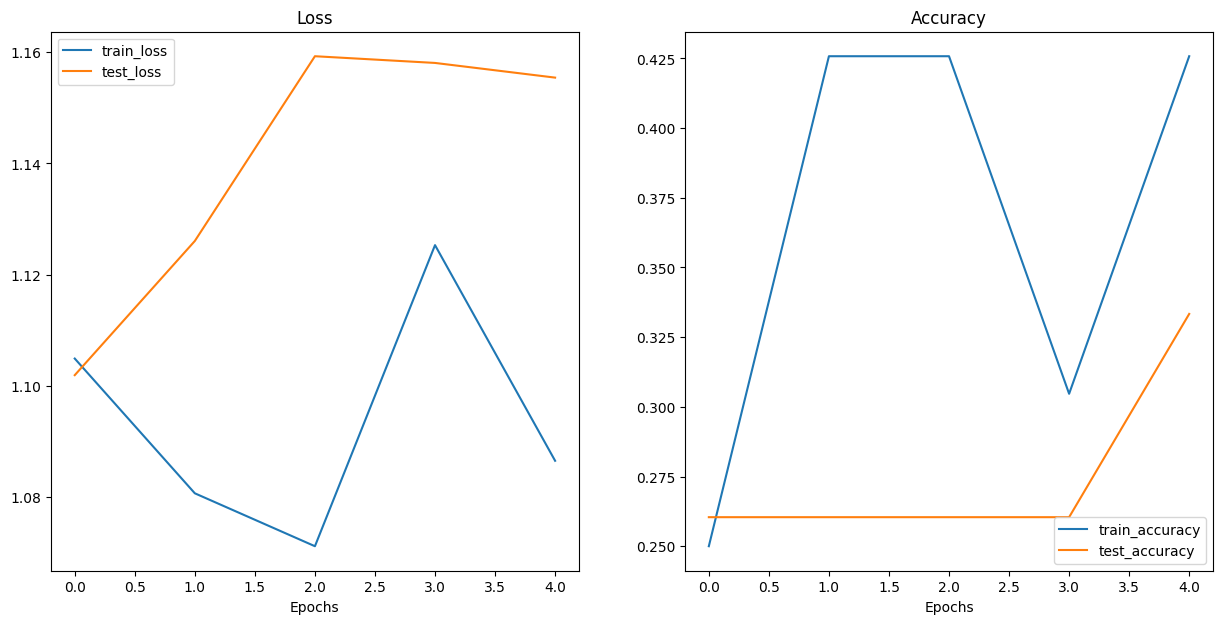

In [ ]:
## plot model loss and accuracy
plot_loss_curves(model_1_results)

## 10 Compare models results

After evaluating our modelling exeperiments on their own, it's import to compare them to each other

There's a few differents ways to do this

1. Hard coding(What we're doing)
2. Pytorch + Tensorboard - https://pytorch.org/docs/stable/tensorboard.html
3. Weights & Biases - https://wandb.ai/site/experiment-tracking
4. MLFlow - https://mlflow.org

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)

In [ ]:
model_0_df

train_loss  train_acc       test_loss  test_acc
0    1.106319   0.304688  tensor(1.0983)  0.301136
1    1.099806   0.328125  tensor(1.0697)  0.541667
2    1.086854   0.488281  tensor(1.0808)  0.492424
3    1.084233   0.398438  tensor(1.0608)  0.583333
4    1.066216   0.414062  tensor(1.0654)  0.564394

In [ ]:
model_1_df

train_loss  train_acc       test_loss  test_acc
0    1.104914   0.250000  tensor(1.1019)  0.260417
1    1.080687   0.425781  tensor(1.1261)  0.260417
2    1.071172   0.425781  tensor(1.1593)  0.260417
3    1.125309   0.304688  tensor(1.1581)  0.260417
4    1.086534   0.425781  tensor(1.1554)  0.333333

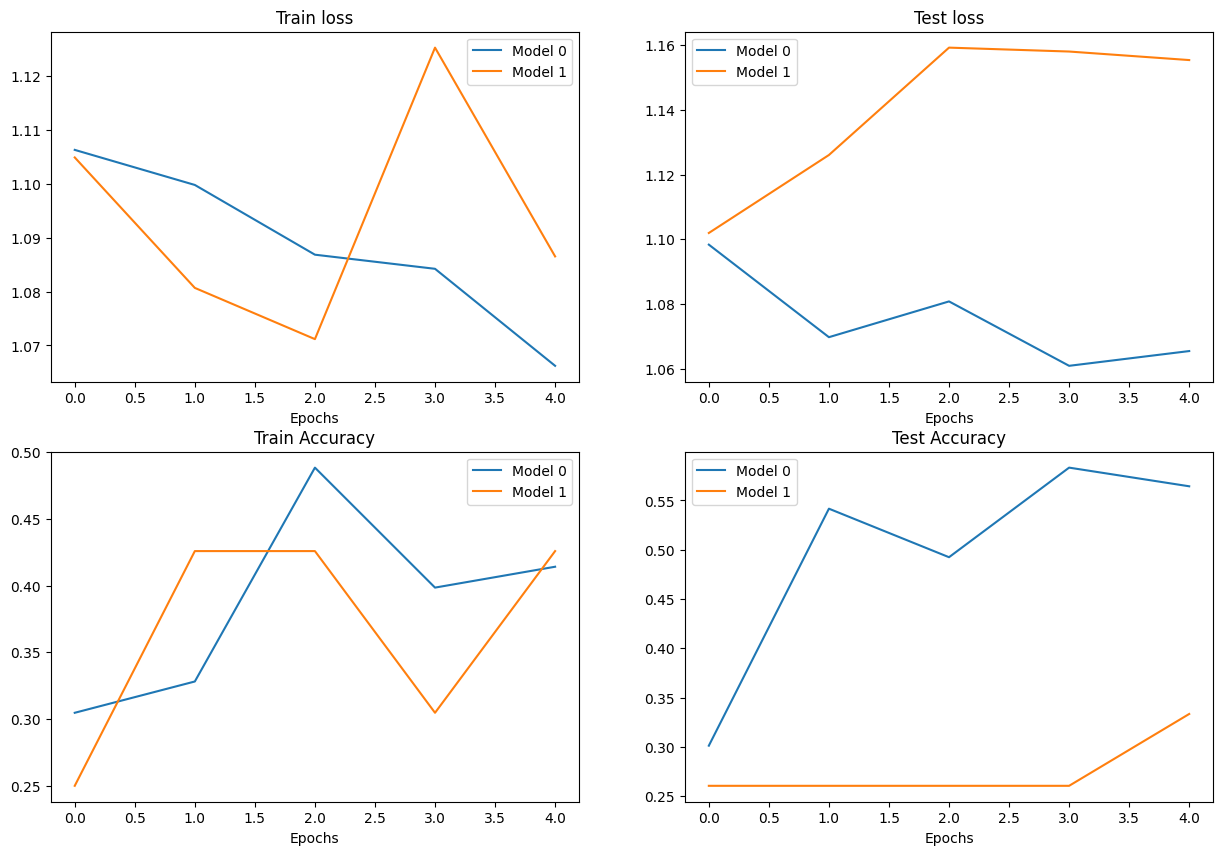

In [ ]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get the number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2,2,1)
plt.plot(epochs, model_0_df['train_loss'], label='Model 0')
plt.plot(epochs, model_1_df['train_loss'], label='Model 1')
plt.title("Train loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2,2,2)
plt.plot(epochs, model_0_df['test_loss'], label='Model 0')
plt.plot(epochs, model_1_df['test_loss'], label='Model 1')
plt.title("Test loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train loss
plt.subplot(2,2,3)
plt.plot(epochs, model_0_df['train_acc'], label='Model 0')
plt.plot(epochs, model_1_df['train_acc'], label='Model 1')
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot train acc
plt.subplot(2,2,4)
plt.plot(epochs, model_0_df['test_acc'], label='Model 0')
plt.plot(epochs, model_1_df['test_acc'], label='Model 1')
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend()


## 11. Making a prediction on a custom image

Although we've trained a model on custom data... how do you make a prediction on a sample/image that's no in either training or test dataset

In [ ]:
# Download a costom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
  with open(custom_image_path, 'wb') as f:
    # When downloading from GitHub, need to use the raw file link
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
    print(f"Downloading {custom_image_path}...")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists, skipping download...")

### 11.1 Loading in a constom image with PyTorch

We have to make sure our image is in the format  as the data our model was treined on.

- In tensor form datatype(torch.float32)
- Of shape 64x64x3
- On the right device

We can read an image into PyTorch using - https://pytorch.org/vision/stable/generated/torchvision.io.read_image.html

In [ ]:
import torchvision

# Read a custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
print(f"Custom image tensor:\n{custom_image_uint8}")
print(f"Custom image shape:{custom_image_uint8.shape}")
print(f"Custom image datatype:{custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
Custom image shape:torch.Size([3, 4032, 3024])
Custom image dataty

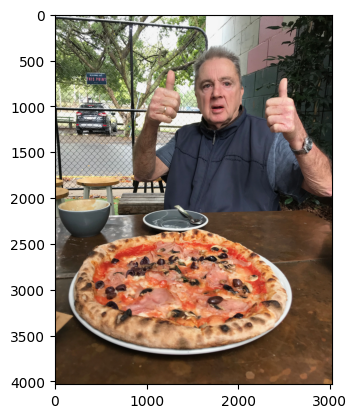

In [ ]:
plt.imshow(custom_image_uint8.permute(1, 2, 0))

### 11.2 Making a prediction on a custom image with a treined PyTorch model

In [ ]:
# Try to a make a predtion on a imagein uint8 format
model_1.eval()
with torch.inference_mode():
  model_1(custom_image_uint8.to(device))

RuntimeError: ignored

In [ ]:
# Load in the custom image and convert to torch.float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)/255
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

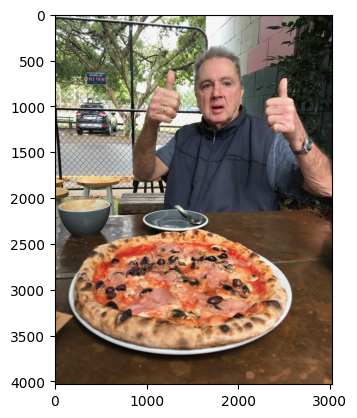

In [ ]:
plt.imshow(custom_image.permute(1, 2, 0))

In [ ]:
model_1.eval()
with torch.inference_mode():
  model_1(custom_image.to(device))

RuntimeError: ignored

In [ ]:
# Create a transform pipeline to resize the image
from torchvision import transforms
custom_image_transform = transforms.Compose({
    transforms.Resize(size=(64, 64))
})

# Transform targe image
custom_image_transformed = custom_image_transform(custom_image)

# Print out the shapes
print(f"Original shape: {custom_image.shape}")
print(f"Transformed shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
Transformed shape: torch.Size([3, 64, 64])


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


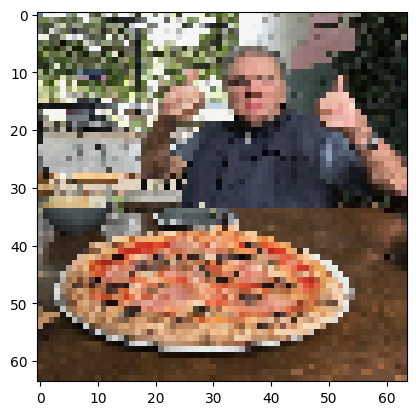

In [ ]:
plt.imshow(custom_image_transformed.permute(1, 2, 0))

In [ ]:
# This will error: the image on right device
model_1.eval()
with torch.inference_mode():
  model_1(custom_image_transformed)

RuntimeError: ignored

In [ ]:
# This will erro: no batch
model_1.eval()
with torch.inference_mode():
  model_1(custom_image_transformed.to(device))

RuntimeError: ignored

In [ ]:
# This will erro: no batch
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))

custom_image_pred

tensor([[ 0.0662,  0.0545, -0.2034]])

In [ ]:
class_names

['pizza', 'steak', 'sushi']

Note, to make a prediciton on a custom image we had to:

* Load the image and turn it into a tensor
* Make sure the image was the same datatype as the model(torch.float32)
* Make sure the image was the same shape as the data model was treined on(3, 64, 64) with a batch size (1, 3, 64, 64)
* Make sure the image was on the same device as our model

In [ ]:
# Convert logits -> prediction probabilities
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.3634, 0.3591, 0.2775]])

In [ ]:
# Convert prediction probabilities to label prediction
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
class_names[custom_image_pred_label]

'pizza'

### 11.3 Putting custom image prediction together: buildin a fuction

Ideal outcome:

A fuction where we pass an image path to and haveour model predicton that image and plot the image + prediction

In [ ]:
def predict(model: torch.nn.Module, image_path: str, class_names, true_class=None, transform=None, device=device):
  """Makes a prediction on a target image with a trained model and plots the image and prediction"""

  # 1. Load in the custom image and convert to torch.float32 and normalize between [0, 1]
  image = torchvision.io.read_image(image_path).type(torch.float32)
  image /= 255

  # 2. Create a resize transform if there isn't a transform parameter
  if transform is None:
    transform = torchvision.transforms.Compose([
        torchvision.transforms.Resize(size=(64, 64))
    ])

  # 3. Transform image
  image_transformed = transform(image)

  # 4. Add the batch size dimesion
  image_transformed = image_transformed.unsqueeze(dim=0)

  # 5. Send to target device
  image_transformed.to(device)

  # 6. Predicting, with inference mode
  model.eval()
  model.to(device)
  with torch.inference_mode():
    image_pred = model(image_transformed)

  # 6. Going from logits to predict probabilities and then to predict label
  label_pred = torch.softmax(input=image_pred, dim=1)
  label = torch.argmax(input=label_pred, dim=1)
  label = f"Class: {class_names[label]} | {label_pred.max().cpu()*100:.3f}%"

  # 7. Plot image and it's label
  plt.figure(figsize=(7, 7))
  plt.imshow(image.permute(1, 2, 0))
  if true_class is not None:
    color = 'r' if true_class not in label else 'g'
    plt.title(label, fontdict={'color': color})
  else:
    plt.title(label)
  plt.axis(False)




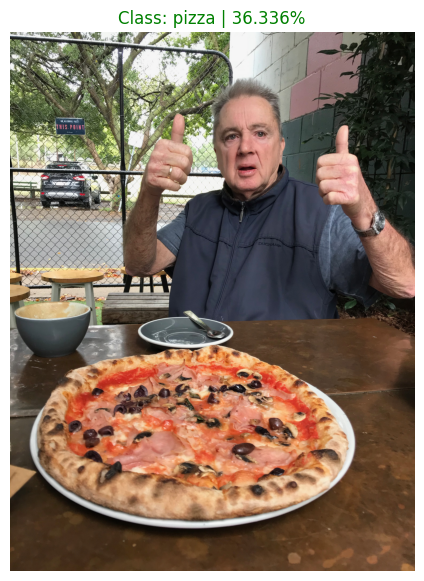

In [ ]:
predict(model=model_1,
        image_path=str(custom_image_path),
        class_names=class_names,
        true_class="pizza",
        device=device)

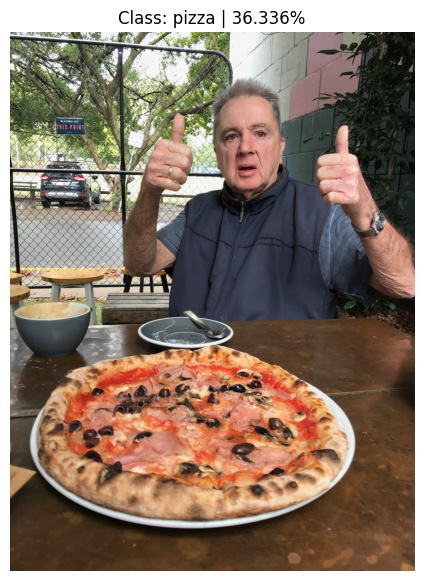

In [ ]:
predict(model=model_1,
        image_path=str(custom_image_path),
        class_names=class_names,
        device=device)
